## **ID: 2215151034**

### ***a) Simulating 60 weeks, what is the estimated average order size?***

In [32]:
import numpy as np

weeks = 60
order_intervals = weeks // 2  # Orders every 2 weeks
inventory_levels = [15, 25, 35, 40, 42, 55]
probabilities = [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]

simulated_inventory = np.random.choice(inventory_levels, size=order_intervals, p=probabilities)
order_sizes = 100 - simulated_inventory
avg_order_size = np.mean(order_sizes)

print("--- Monte Carlo Simulation ---")
print("Simulated Inventory at Orders:", simulated_inventory)
print("Order Sizes:", order_sizes)
print("Average Order Size over 60 weeks:", avg_order_size)

--- Monte Carlo Simulation ---
Simulated Inventory at Orders: [25 35 35 25 35 15 40 40 25 40 35 40 25 25 40 40 35 25 35 35 25 35 40 15
 25 40 15 35 35 35]
Order Sizes: [75 65 65 75 65 85 60 60 75 60 65 60 75 75 60 60 65 75 65 65 75 65 60 85
 75 60 85 65 65 65]
Average Order Size over 60 weeks: 68.33333333333333


### ***b) Based on the simulation, what is the average total cost of "having" the product?***

In [33]:
# Costs
order_cost_per_order = 50
product_cost = 4
holding_cost_per_week = 1

# Calculations
total_order_cost = order_cost_per_order * order_intervals
total_product_cost = product_cost * np.sum(order_sizes)
average_inventory = np.mean(simulated_inventory)
total_holding_cost = average_inventory * holding_cost_per_week * weeks

total_cost = total_order_cost + total_product_cost + total_holding_cost

print("Total Order Cost:", total_order_cost)
print("Total Product Cost:", total_product_cost)
print("Total Holding Cost:", total_holding_cost)
print("Average Total Cost over 60 weeks:", total_cost)

Total Order Cost: 1500
Total Product Cost: 8200
Total Holding Cost: 1900.0
Average Total Cost over 60 weeks: 11600.0


## **🧮 Single Server Queue Simulation**
### ***1. Perform a simulation for 200 customers with λ=3 and μ=4. Calculate and compare the waiting time and server utilization.***


--- Queue Simulation (λ=3, μ=4) ---
Average Waiting Time: 0.28 units
Server Utilization: 66.65%
Average Queue Length: 0.64 customers


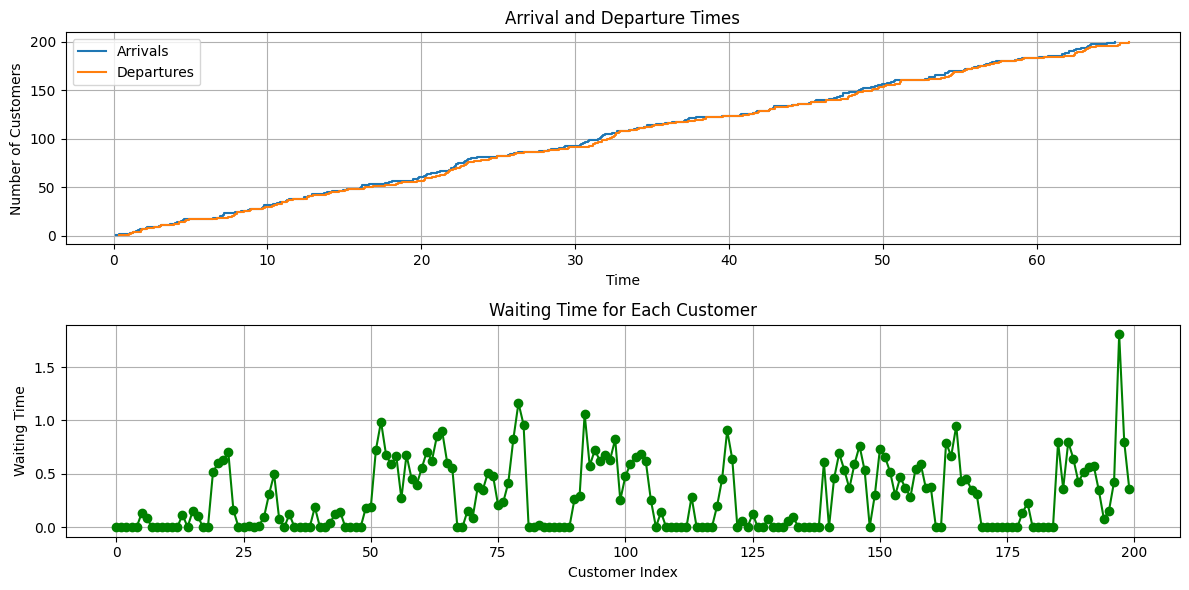

In [34]:
import matplotlib.pyplot as plt
lambda_rate = 3
mu_rate = 4
n_customers = 200

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
total_times = end_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("\n--- Queue Simulation (λ=3, μ=4) ---")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Arrival and Departure Times')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.title('Waiting Time for Each Customer')
plt.grid(True)

plt.tight_layout()
plt.show()

### ***2. Simulate a system with λ=8 and μ=6. Discuss the impact of server overload on system performance.***


--- Overloaded System (λ=8, μ=6) ---
Average Waiting Time: 5.07 units
Server Utilization: 99.78%


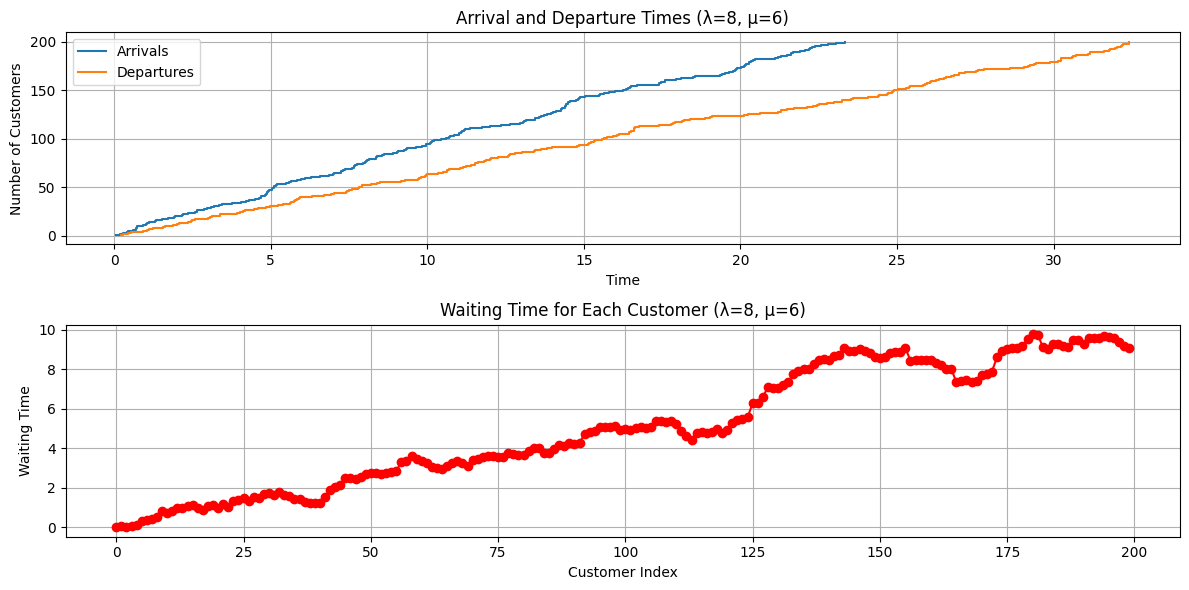

In [37]:
lambda_rate = 8
mu_rate = 6

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]

print("\n--- Overloaded System (λ=8, μ=6) ---")
print(f"Average Waiting Time: {np.mean(waiting_times):.2f} units")
print(f"Server Utilization: {server_utilization*100:.2f}%")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Arrival and Departure Times (λ=8, μ=6)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(n_customers), waiting_times, 'ro-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.title('Waiting Time for Each Customer (λ=8, μ=6)')
plt.grid(True)

plt.tight_layout()
plt.show()

### ***3. Modify the program to include a limited queue capacity (e.g., maximum 10 customers). Analyze how this affects the performance metrics.***


--- Limited Queue Capacity (Max 10) ---
Accepted Customers: 136
Rejected Customers: 64
Average Waiting Time: 6.66 units
Server Utilization: 100.89%


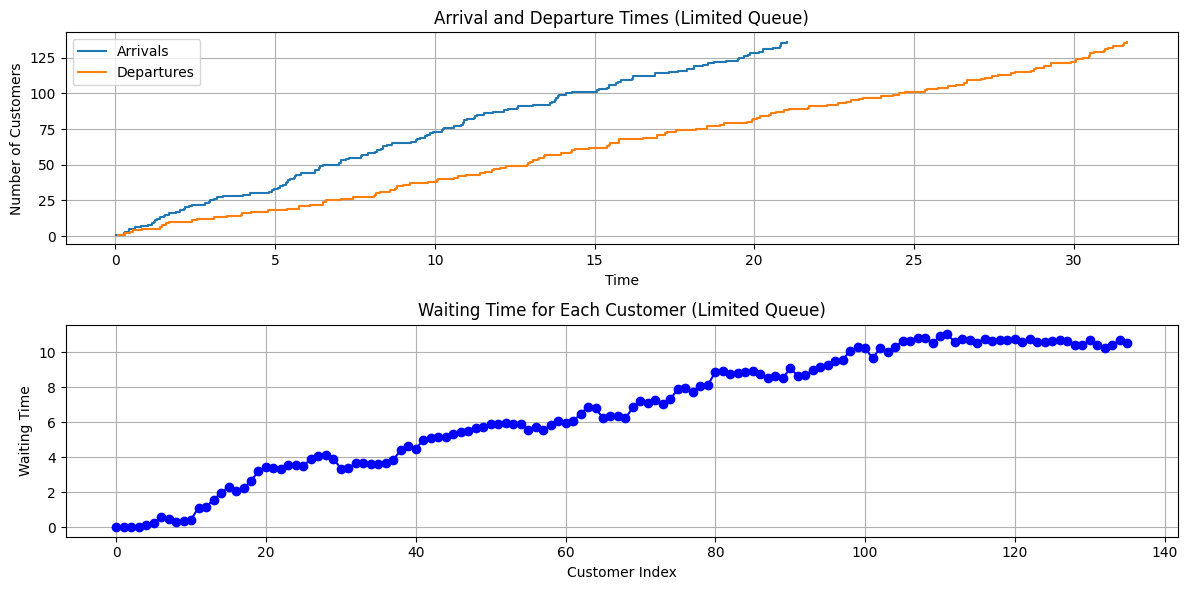

In [38]:
lambda_rate = 6
mu_rate = 5
max_queue_size = 10

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = []
end_times = []
accepted = 0
rejected = 0
last_end_time = 0
queue = []

for i in range(n_customers):
    arrival = arrival_times[i]
    queue = [end for end in queue if end > arrival]  # Clean up finished

    if len(queue) < max_queue_size:
        start = max(arrival, last_end_time)
        end = start + service_times[i]
        start_times.append(start)
        end_times.append(end)
        last_end_time = end
        queue.append(end)
        accepted += 1
    else:
        rejected += 1

waiting_times = np.array(start_times) - arrival_times[:accepted]
server_utilization = np.sum(service_times[:accepted]) / end_times[-1]

print("\n--- Limited Queue Capacity (Max 10) ---")
print("Accepted Customers:", accepted)
print("Rejected Customers:", rejected)
print(f"Average Waiting Time: {np.mean(waiting_times):.2f} units")
print(f"Server Utilization: {server_utilization*100:.2f}%")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.step(arrival_times[:accepted], np.arange(1, accepted+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, accepted+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Arrival and Departure Times (Limited Queue)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(accepted), waiting_times, 'bo-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.title('Waiting Time for Each Customer (Limited Queue)')
plt.grid(True)

plt.tight_layout()
plt.show()